# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab did not move during the simulation.  (I assume we have to program it to!) The cab is receiving positive and negative rewards (we're not told the units, but basically it is getting feedback on each time iteration about if what it did during that turn was good or bad).

The cab is just idling the whole time.  There are three scenarios that can occur while this is happening, and they give different rewards:

A red light is large positive award because at a red light, you should be stopped. The cab is definitely doing the correct thing.

A green light when there is oncoming traffic is a small positive award (presumably you are waiting to turn left, so again, you are doing the correct thing, or you are possibly doing the correct thing -- the simulation doesn't actually know if you are idling purposely while waiting to turn left; in our case, we are idly idling).

A green light when there is no oncoming traffic is a negative award - you should be moving, not idling.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In agent.py:

When running the sim, the following 3 flags (along with others) can be set:

grid_size   - discrete number of intersections (columns, rows), default is (8, 6)

enforce_deadline - set to True to enforce a deadline metric

update_delay - continuous time (in seconds) between actions, default is 2.0 seconds

Altering the grid_size could come in handy if we wanted to start with a very simple grid. We might want to turn off the enforcement of the deadline at times so that we can focus on dealing with the traffic lights correctly.  Changing update_delay allows us to speed up or slow down the simulation.  The first thing I might do is slow it way down so that I can really watch what is happening with the red lights.

In environment.py, act() is called when an agent performs an action.

In simulator.py:

render_text is the non-graphical display of the simulation, and gets written in the terminal

render is the graphical display of the simulation

In planner.py, the function considers East-West first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


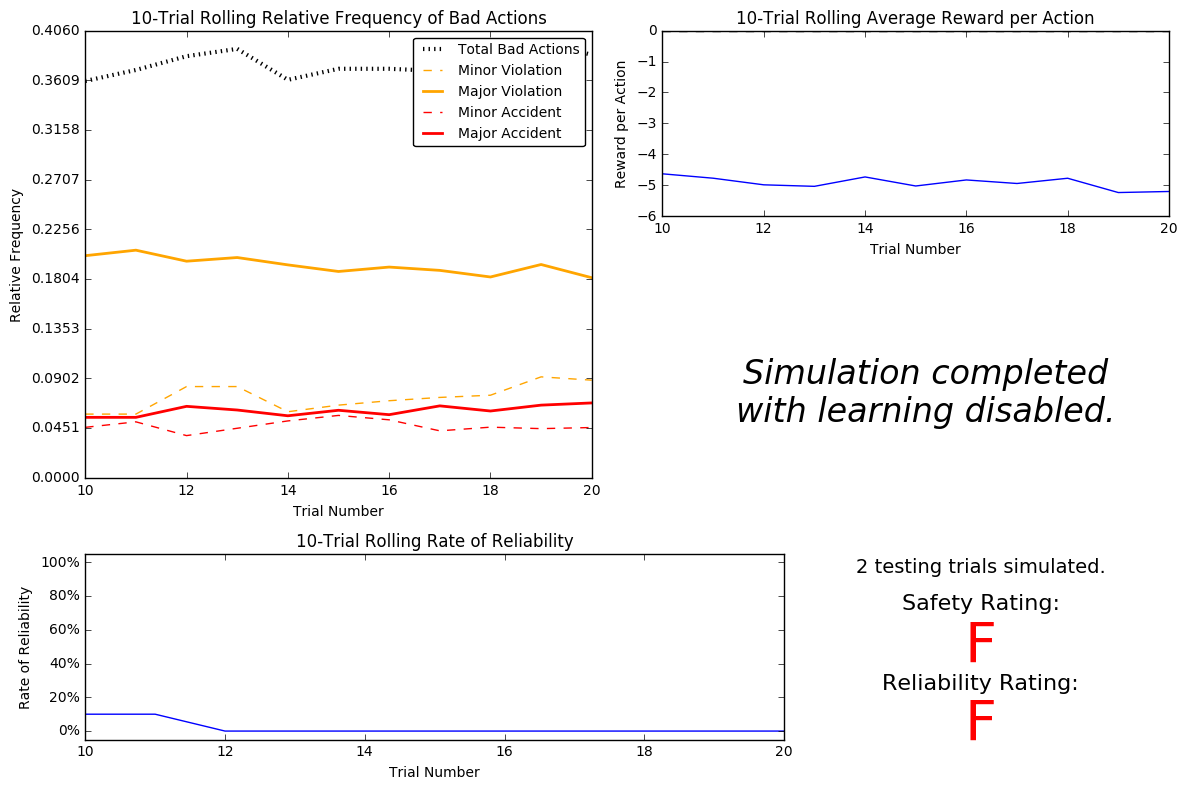

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The driving agent is making bad decisions about 36-40% of the time.  Those decisions cause accidents about 3-12% of the time.  The rate of reliability never hits 20% (for this particular data set), and this rate definitely makes sense.  An agent making random decisions about which way to go does have a chance of getting a passenger to their destination, and even a chance at getting them there without an accident, but it would be random luck for it to happen.  As the number of trials increases, the results do not change significantly.  The agent is not learning anything and applying it to its decision making.  The 10th trial is just as random and uninformed as the 1st trial.  If it is any better, it is completely based on chance.

The agent gets a consistently negative reward average.  This makes sense, since we know that it made the wrong decision about 60% of the time.  I would say that is HAS been penalized heavily - not just because the rolling average is negative the entire time, but also because it is SO far below zero.  If it got positive rewards 40% of the time and negative rewards 60% of the time, those aren't incredibly disparate percentages.  You might, very broadly, expect the reward average to land around 0.  The fact that it is very negative indicates heavy penalties and smaller positive rewards.  The rewards pretty much got eliminated by the penalties.

Obviously this Smartcab would not be considered safe or reliable for its passengers.  It gets in a major accident 5-10% of the time it is on the road!  It also rarely gets the passengers to their destinations on time.  Let's hope we can train our cab to operate better than a random algorithm!

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For safety, 'light' is very important.  This is the broadest determinant of whether or not the car should be driving.  Without considering finer details (like oncoming traffic), stopping on red and going on green will prevent a lot of accidents!  It obviously helps with efficiency as well because if we know the light is green, we can move.

For efficiency, 'waypoint' is probably the most important feature.  If we keep keep waypoint in mind and operate greedily, we will have a good chance at making it to our destination before our deadline.  At every decision point, we just try to go towards our destination.

For safety, I also think we should include 'oncoming' in our agent.  This will allow us to make turns more safely (left turn on green).

I left out 'deadline' because it will not help us train.  It will not impact the decisions we make.  We are trying to take the fastest route to the destination anyway.

I also left out 'left' and 'right'.  I do think these would help somewhat with safety.  However, each one has 4 possible states, so this would make our Q dictionary very large (and thus, either require more trials or be less filled in and less useful).  I think it would benefit us more to leave them out.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**  For the three features I named above as being important to safety and efficiency, there are 2 'light' settings, 3 'waypoint' settings (forward, left, and right), and 4 'oncoming' settings (the oncoming car could be turning left, turning right, going straight, or not moving). This would give a total of 2x3x4=24 possibilities.

I feel like 24 states would be pretty reasonable to train on.  I can't really say how long it would take to populate most of the Q dictionary (making random decisions while learning), but some other possibilities I was thinking of had 128 states.  24 states is almost easy enough that you could do it manually!


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

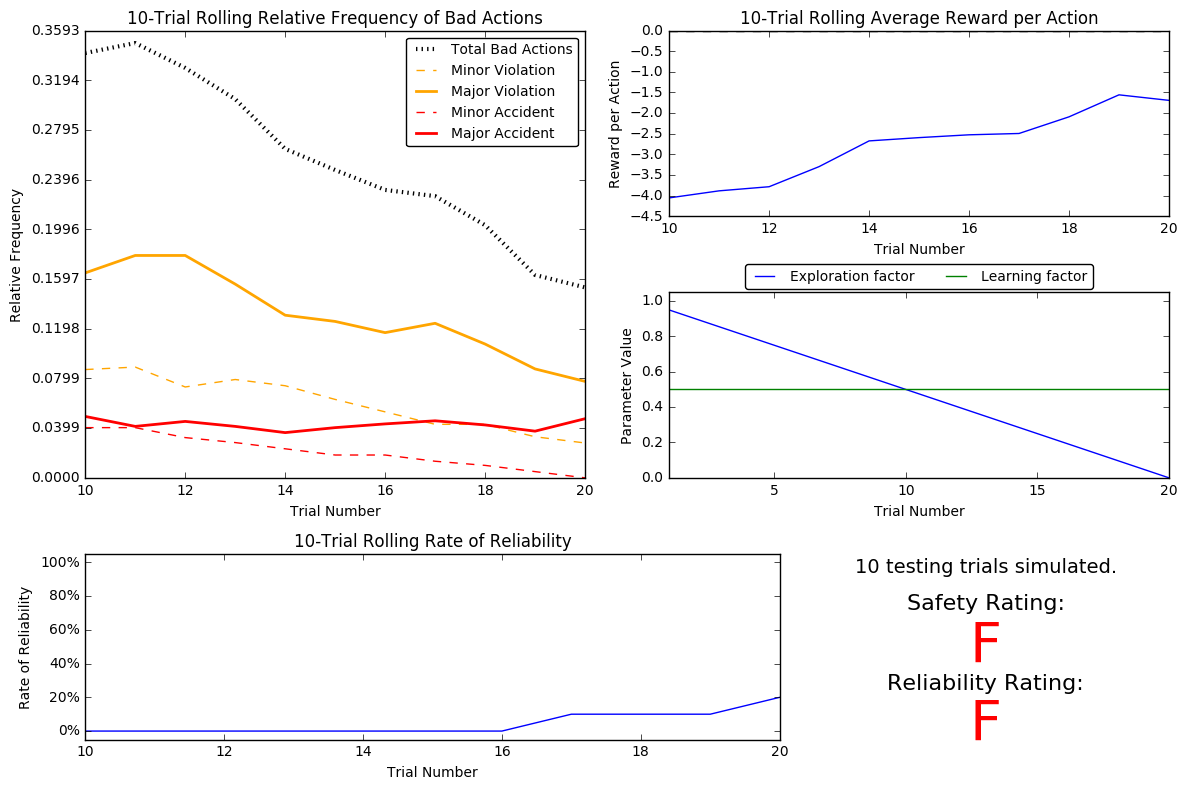

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
In the first few trials, the Q-Learning agent looks just like the basic driving agent.  It has learned very little, and so is still making bad choices.  This is reflected in the number of bad actions.  The average reward starts out low as well; again, much like that of the basic driving agent.

The driving agent required 20 trials.  This is exactly what I would have expected with a decay function where epsilon, passed in as 1, decreases by 0.05 each time.  The parameters panel shows this behavior.  The first value of epsilon is 0.95 because epsilon decays prior to a trial running (so it never actually runs at epsilon==1).  Alpha, of course, stays the same.

Unfortunately, the safety and reliability are still poor.  It is not surprising that the reliability is still low.  We have not yet set the agent to consider its destination.  If it makes it to its destination, it's still just by luck!  Safety is still getting a grade of 'F' as well.  An F is given if even one major accident occurs.  At the end of training, major accidents are still occuring about 4% of the time.  So, it's not surprising that they are still happening in the testing set.

However, overall, the number of bad actions decreased significantly.  Despite still being given a failing grade in safety, the chart showing the number of bad actions does show us that the agent's driving is improving.  Also, the average reward increased throughout learning as well.  This would be expected; the more time it trains and deliberately chooses the best option (instead of a random option), the higher the average reward will be.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

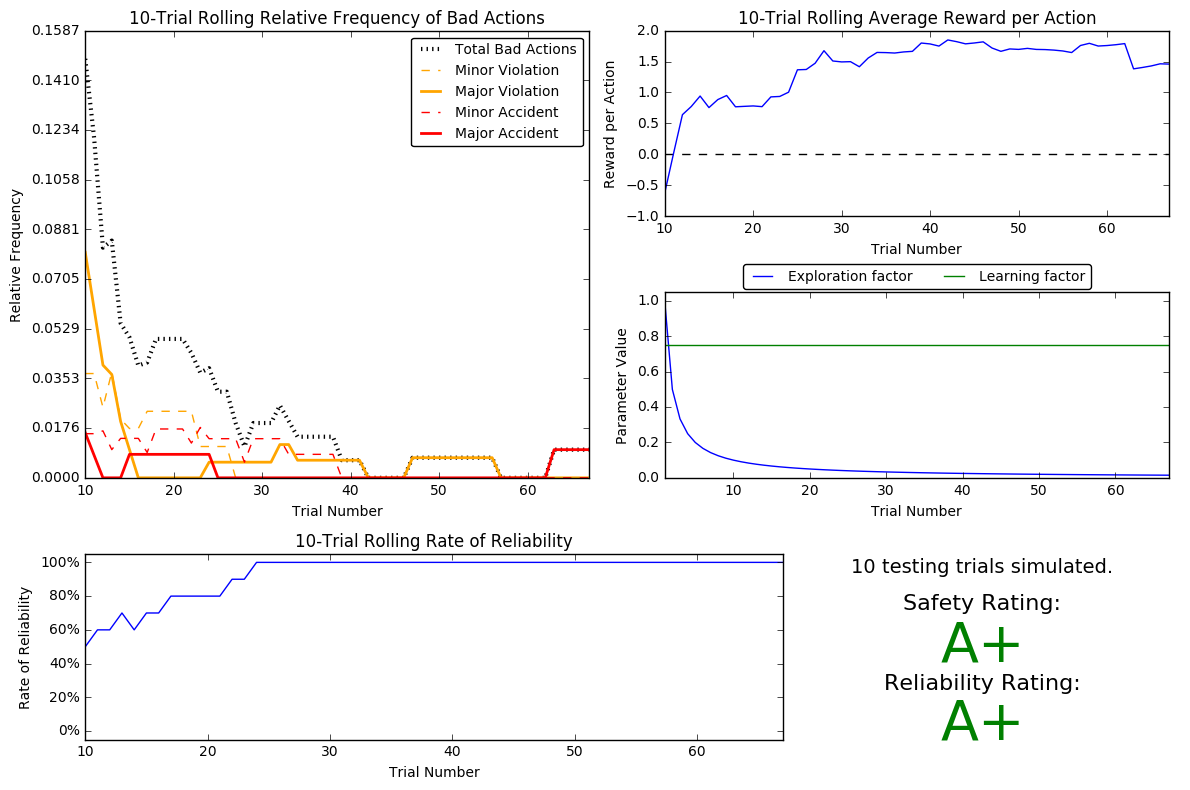

In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The decaying function I used for epsilon was 1/t.  That, along with tweaking the tolerance, made it so that it spent 67 trials learning.  I settled on 0.015 for the epsilon-tolerance.  Mathematically, I knew that 0.01 would give me 100 trials.  As I experimented, I realized that the algorithm didn't need 100 trials to get to a high safety rating, so I increased the tolerance.  I used alpha=0.75 (a fairly high alpha value) because I knew the first few entries into the Q dictionary would be quite skewed, and I wanted to be able to quickly overwrite them.  (Ideally we would use a decay function, but it seemed like overkill here.)

This Q-Learner made huge improvements in the areas of safety and efficiency.  The average of bad actions on the learning trials went down to around 1% (from 16%).  The rolling average award not only got into the positive area, but went up to about 2.  Reliability got up to nearly 100% (although when I ran this multiple times, it didn't always do quite this well).  It went from grades of F and F to grades of A+ and A+.

Yes, I would say that the Q-Learner results show that the driving agent successfully learned an appropriate policy.  I certainly wouldn't use this code to run an actual cab; it would need far more finessing.  But for the purposes of this project, it succeeded in learning how to get to its destination safely and efficiently (as evidenced by the grades on the testing set).

Yes, I am satisfied with the safety and reliability ratings of the Smartcab.  If I could make any changes, I would probably try to tweak it more so it required less trials to produce the same scores.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

From my code: state = (inputs['light'], inputs['oncoming'], waypoint)

So, a few examples of states would be:

('red', 'right', 'forward')

('green', None, 'forward')

('red', None, 'right')

Looking through my text file, not all of the policies are optimal.  For example, for this one:

('green', 'right', 'left')
 -- forward : 1.05
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 
we would want the agent to head 'left' (toward the waypoint), but 'forward' has the highest reward.  This policy was the very first one listed in the text file, so we know it happened early.  The state may only have happened once in all of our training trials, and so it learned a little, but not quite enough.
 
 Here is an example of a correct policy (and a fairly interesting one, actually):
 
 ('green', None, 'forward')
 -- forward : 1.74
 -- right : 0.31
 -- None : -3.93
 -- left : 0.29
 
 So, we have a green light, no oncoming traffic, and our waypoint is forward.  None has a heavy negative reward.  This is good.  Don't sit at a green light waiting to go forward!  Right and left actually have small positive rewards.  This makes sense.  If the agent made the wrong decision and went right or left, when it should have gone forward, it still didn't commit a horrible traffic violation.  We know it didn't run into anyone (left turn) because there was no oncoming traffic.  Right and left were not the most efficient ways to go to get to our destination, but we still moved and at our next decision, we can get back on track.  A small positive reward is reasonable for these two situations.  However, our highest reward value is forward, which is exactly what we would want.  The light is green, going forward is safe, and going forward is the right direction.
 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
The Smartcab state only has features that consider the current state.  It does not have any way to know where it is going to end up.  It gives a high reward, after the fact, to having gone the same direction that the waypoint indicated.  It would have to be constantly re-calculating all possible routes from here to there, which would be very computationally expensive.

Environment: We are already implementing a greedy algorithm based on distance to destination.  The path we are taking should already be the shortest one available (assuming our training algorithm did a good job). Thus, the only way to improve performance would be to anticipate the lights.  If we could look ahead and avoid red lights, we could avoid spending time stopped.  However, we can't do this because our lights operate on random times.  Even if we saved the current state of all of our lights, we have no way of knowing how long each light's next state will be.  (For example, a light 4 intersections away from me is turning red on the next time iteration.  Will it be red or green when I get there?  I can't figure that out right now.)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.